<a href="https://colab.research.google.com/github/VasylDvorakDS/Cancer_tumor_prediction_with_linear_regration/blob/master/Cancer_tumor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import  tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
data =  load_breast_cancer()

In [33]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
type(data)

sklearn.utils._bunch.Bunch

In [35]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
data.data.shape

(569, 30)

In [37]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
data.target.shape

(569,)

In [40]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [41]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [44]:
N, D= X_train.shape

In [45]:
N, D

(381, 30)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [48]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,),activation='sigmoid'))

In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [51]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 0.7206 - accuracy: 0.5433 - val_loss: 0.6470 - val_accuracy: 0.6064
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6404 - accuracy: 0.6667 - val_loss: 0.5759 - val_accuracy: 0.6968
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5731 - accuracy: 0.7428 - val_loss: 0.5159 - val_accuracy: 0.7872
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.7953 - val_loss: 0.4666 - val_accuracy: 0.8564
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4715 - accuracy: 0.8241 - val_loss: 0.4243 - val_accuracy: 0.8936
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4331 - accuracy: 0.8688 - val_loss: 0.3894 - val_accuracy: 0.9202
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4008 - accuracy: 0.8924 - val_loss: 0.3608 - val_accuracy: 0.9415
Epoch 8/100


In [52]:
print("Training score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9790
Training score: [0.09461694955825806, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9894
Test score: [0.07607444375753403, 0.9893617033958435]


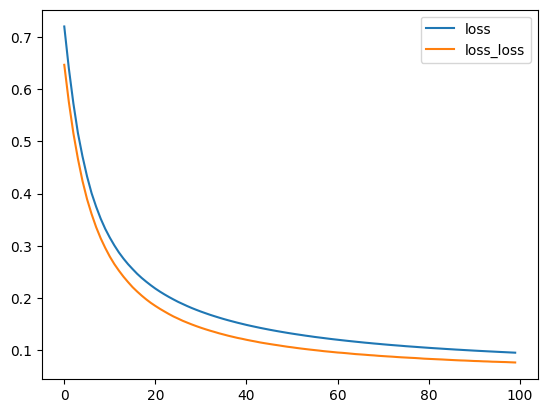

In [53]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loss_loss')
plt.legend()

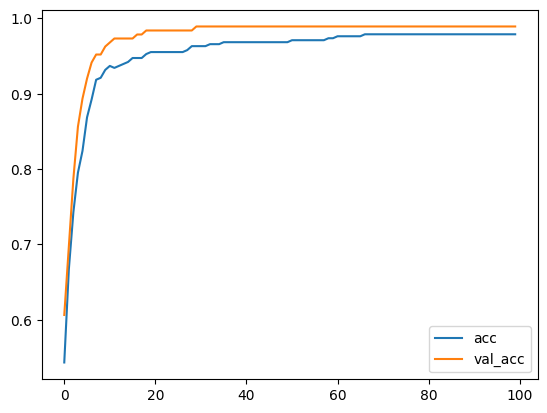

In [54]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

#Making Prediction

In [55]:


# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)



6/6 [==============================] - 0s 2ms/step
[[1.3632444e-03]
 [9.9507046e-01]
 [9.7944140e-01]
 [1.3894465e-06]
 [9.9378234e-01]
 [9.6523589e-01]
 [9.8365963e-01]
 [9.5755434e-01]
 [8.0986601e-01]
 [8.7984610e-01]
 [5.0223347e-02]
 [9.2749864e-01]
 [1.1747353e-04]
 [9.3626112e-01]
 [2.2017413e-04]
 [9.9041581e-01]
 [1.4723913e-03]
 [9.8844934e-01]
 [9.6939445e-01]
 [7.3012078e-01]
 [9.9641734e-01]
 [9.9918187e-01]
 [9.8259884e-01]
 [2.8074570e-07]
 [1.0931209e-05]
 [9.9805504e-01]
 [9.7808886e-01]
 [9.9394530e-01]
 [9.7326148e-01]
 [9.6610266e-01]
 [9.9140304e-01]
 [8.4273899e-01]
 [9.9743879e-01]
 [9.8256999e-01]
 [9.6577287e-01]
 [9.9755645e-01]
 [8.6083817e-01]
 [5.0198641e-03]
 [9.9977827e-01]
 [9.6152300e-01]
 [4.9638893e-06]
 [9.7665989e-01]
 [2.2541045e-03]
 [9.7589451e-01]
 [9.8848182e-01]
 [9.9461311e-01]
 [9.9975097e-01]
 [9.8319244e-01]
 [9.4989842e-01]
 [3.1051801e-05]
 [5.5035673e-02]
 [9.8811316e-01]
 [6.2477547e-03]
 [9.7537386e-01]
 [9.9919182e-01]
 [5.2028114e-0

In [56]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.]


In [57]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9894
Evaluate output: [0.07607444375753403, 0.9893617033958435]


# Saving and Loading a Model

In [62]:


# Let's now save our model to a file
model.save('linearclassifier.h5')



In [63]:


# Check that the model file exists
!ls -lh



total 24K
-rw-r--r-- 1 root root  19K May 25 16:43 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May 23 13:25 sample_data


In [60]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9894


[0.07607444375753403, 0.9893617033958435]

In [64]:


# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>